# Python setup

In [33]:
import os

# Changes the notebook working directory on level up.
%cd ..

# Running main python script.
%run -i "src/main.py"

# Data set from main.py
data_set

/Users/Anne/Documents/UIS/DAT540/Project_Netflix/Project/dat540-netflix_catalogue


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,Unknown director,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,Unknown date_added,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Unknown director,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,Unknown date_added,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown director,Unknown cast,Unknown country,Unknown date_added,2016,Unknown rating,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,Unknown date_added,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


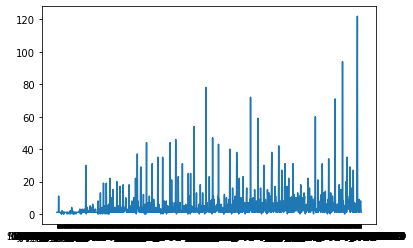

1, 'January 31, 2017': 2, 'February 1, 2017': 18, 'February 2, 2017': 1, 'February 3, 2017': 2, 'February 4, 2017': 1, 'February 5, 2017': 3, 'February 7, 2017': 1, 'February 8, 2017': 3, 'February 10, 2017': 5, 'February 11, 2017': 1, 'February 12, 2017': 1, 'February 14, 2017': 4, 'February 15, 2017': 8, 'February 16, 2017': 2, 'February 17, 2017': 6, 'February 18, 2017': 1, 'February 19, 2017': 3, 'February 20, 2017': 1, 'February 21, 2017': 1, 'February 22, 2017': 10, 'February 23, 2017': 2, 'February 24, 2017': 3, 'February 25, 2017': 2, 'February 26, 2017': 1, 'February 27, 2017': 1, 'February 28, 2017': 3, 'March 1, 2017': 22, 'March 2, 2017': 2, 'March 3, 2017': 1, 'March 4, 2017': 0, 'March 7, 2017': 1, 'March 8, 2017': 1, 'March 9, 2017': 5, 'March 10, 2017': 37, 'March 14, 2017': 4, 'March 15, 2017': 8, 'March 16, 2017': 6, 'March 17, 2017': 5, 'March 18, 2017': 2, 'March 20, 2017': 2, 'March 21, 2017': 4, 'March 23, 2017': 1, 'March 24, 2017': 3, 'March 27, 2017': 1, 'March

In [44]:
import datetime
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import scipy as sp

# all unique dates 
date_added = list(set(data_set['date_added']))

datetime_list = []

for date in date_added:
    # remove ',' and leading whitespace from the date string
    sanitized_date_string = date.replace(',', '').lstrip()
    # discard unknown date
    if ('Unknown' not in sanitized_date_string):
        # convert to datetime object
        datetime_format = datetime.datetime.strptime(sanitized_date_string, '%B %d %Y')
        datetime_list.append(datetime_format)

# sort the unique dates
sorted_datetime = sorted(datetime_list)
sorted_datetime_string_list = []
# note that the datetime format is given in the format '%B %#d, %Y', the pound sign is needed 
# in order to remove leading zeroes in dates, '#' for windows '-' for linux (should the code not run)
for datetime_object in sorted_datetime:
    date_string = datetime_object.strftime('%B %-d, %Y')
    sorted_datetime_string_list.append(date_string)
    
# TODO: visualize the categories when they were added (look for themes relating to that period)
# TODO: visualize the frequency of categories added by dates (peak dates)

date_freq_dict = dict()
for date in sorted_datetime_string_list:
    date_freq_dict[date] = len(data_set.loc[data_set['date_added'] == date])

# Showing number of added assets for each unique date.
plt.plot(list(date_freq_dict.keys()), list(date_freq_dict.values()))
plt.show()
print(date_freq_dict)

    



In [43]:
data_set.shape[0]

6234